In [53]:
#Problem statement:- we need to create preditive model for outlet sales,by applying simple linear Regression
#with item_MRP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split

In [54]:
sales_data=pd.read_csv("Train_data_mart.csv")

In [55]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [56]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [106]:
IQR=3101.296400-834.247400
print IQR
#Q3 + 1.5 * IQR
Max_value=3101.296400 + (1.5 * IQR )
print Max_value #the value beyond this would be outlier in the data

2267.049
6501.8699


In [57]:
sales_data.shape

(8523, 12)

In [58]:
sales_data.Item_Weight.mean()

12.857645184136183

In [59]:
sales_data.Item_Weight.fillna(12.857645184136183,inplace=True)# imputation for missing values with mean (0, inplace=True)

In [60]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [61]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [62]:
sales_data.Outlet_Size.mode()

0    Medium
dtype: object

In [63]:
sales_data.Outlet_Size.fillna("Medium",inplace=True)

In [51]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [64]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [67]:
sales_data.Item_Weight.var()

17.86012173506042

In [68]:
sales_data.Item_Weight.std()

4.22612372453297

In [69]:
sales_data.Item_Outlet_Sales.var()

2912140.938499716

In [70]:
sales_data.Item_Outlet_Sales.std()

1706.499615733832

Text(0.5,1,u'Line Plot')

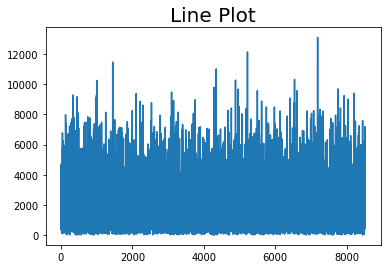

In [90]:
sales_data.Item_Outlet_Sales.plot()

plt.title("Line Plot",size=20)

Text(0.5,1,u'Histogram')

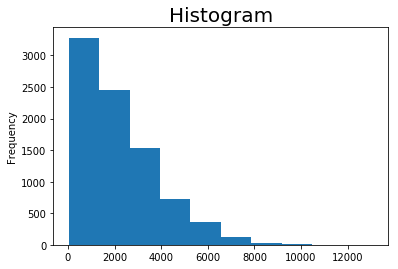

In [93]:
sales_data.Item_Outlet_Sales.plot(kind="hist")

plt.title("Histogram",size=20)

Text(0.5,1,u'Box plot')

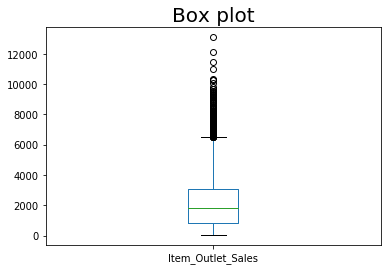

In [95]:
sales_data.Item_Outlet_Sales.plot(kind="box")

plt.title("Box plot",size=20)

In [103]:
sales_data.Item_Outlet_Sales.quantile([0.0,0.98])

0.00      33.290000
0.98    6623.831144
Name: Item_Outlet_Sales, dtype: float64

Text(0.5,1,u'Line Plot')

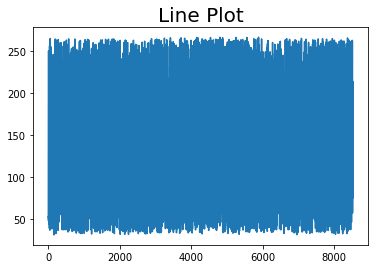

In [109]:
sales_data.Item_MRP.plot()

plt.title("Line Plot",size=20)

Text(0.5,1,u'Box plot')

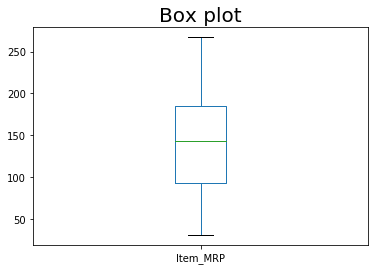

In [110]:
sales_data.Item_MRP.plot(kind="box")

plt.title("Box plot",size=20)

#Conclusion No Major outliers

Text(0.5,1,u'histogram plot')

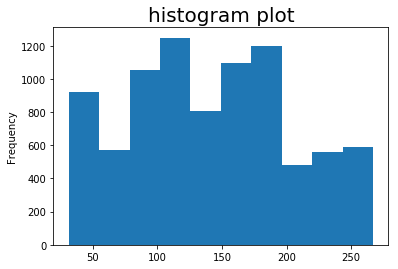

In [111]:
sales_data.Item_MRP.plot(kind="hist")

plt.title("histogram plot",size=20)

In [108]:
sales_data_new=(sales_data.loc[sales_data['Item_Outlet_Sales'] < 6501.8699])

sales_data_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [112]:
sales_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8337 non-null object
Item_Weight                  8337 non-null float64
Item_Fat_Content             8337 non-null object
Item_Visibility              8337 non-null float64
Item_Type                    8337 non-null object
Item_MRP                     8337 non-null float64
Outlet_Identifier            8337 non-null object
Outlet_Establishment_Year    8337 non-null int64
Outlet_Size                  8337 non-null object
Outlet_Location_Type         8337 non-null object
Outlet_Type                  8337 non-null object
Item_Outlet_Sales            8337 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 846.7+ KB


In [113]:
sales_data_new.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000
mean,12.856638,0.066358,139.161087,1997.968094,2059.362844
std,4.250410,0.051838,61.553351,8.309941,1506.099754
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027028,93.046200,1987.000000,810.944400
50%,12.857645,0.053939,141.215400,1999.000000,1747.059200
75%,16.100000,0.095299,183.695000,2004.000000,2998.097400
max,21.350000,0.328391,266.888400,2009.000000,6478.234000


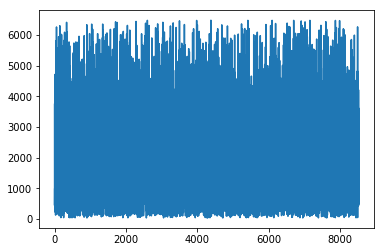

In [114]:
sales_data_new.Item_Outlet_Sales.plot()

In [118]:
cov_a=sales_data_new.Item_MRP
cov_b=sales_data_new.Item_Outlet_Sales
covariance=np.cov(cov_a,cov_b)
covariance

array([[   3788.8150178 ,   51297.13971266],
       [  51297.13971266, 2268336.47005265]])

In [119]:
corrcoef=np.corrcoef(cov_a,cov_b)
corrcoef

array([[1.        , 0.55333445],
       [0.55333445, 1.        ]])

In [136]:
X = sales_data_new.loc[:,['Item_MRP']].values
X

array([[249.8092],
       [ 48.2692],
       [141.618 ],
       ...,
       [ 85.1224],
       [103.1332],
       [ 75.467 ]])

In [137]:
Y = sales_data_new.loc[:,['Item_Outlet_Sales']].values
Y

array([[3735.138 ],
       [ 443.4228],
       [2097.27  ],
       ...,
       [1193.1136],
       [1845.5976],
       [ 765.67  ]])

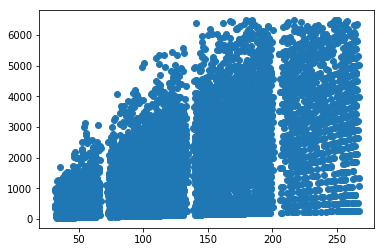

In [122]:
plt.scatter(X,Y)

In [123]:
from pandas.plotting import scatter_matrix

In [130]:
Regression_data = sales_data_new.loc[:,['Item_Outlet_Sales',"Item_MRP"]]
print Regression_data
#df = pd.read_csv(file.csv, delim_whitespace=True)
#Regression_data_sample = Regression_data.sample(n=2000)
#print Regression_data_sample

      Item_Outlet_Sales  Item_MRP
0             3735.1380  249.8092
1              443.4228   48.2692
2             2097.2700  141.6180
3              732.3800  182.0950
4              994.7052   53.8614
5              556.6088   51.4008
6              343.5528   57.6588
7             4022.7636  107.7622
8             1076.5986   96.9726
9             4710.5350  187.8214
10            1516.0266   45.5402
11            2187.1530  144.1102
12            1589.2646  145.4786
13            2145.2076  119.6782
14            1977.4260  196.4426
15            1547.3192   56.3614
16            1621.8888  115.3492
17             718.3982   54.3614
18            2303.6680  113.2834
19            2748.4224  230.5352
20            3775.0860  250.8724
21            4064.0432  144.5444
22            1587.2672  196.5084
23             214.3876  107.6938
24            4078.0250  165.0210
25             838.9080   45.9060
26            1065.2800   42.3112
27             308.9312   39.1164
28            

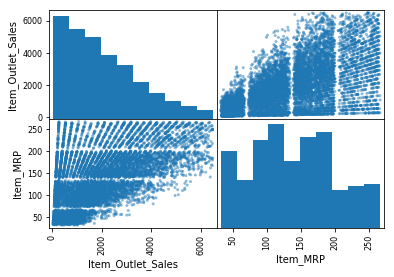

In [131]:
scatter_matrix(Regression_data)
plt.show()

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [138]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [139]:
mymodel=LinearRegression()

In [140]:
mymodel.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
y_pred=mymodel.predict(X_test)

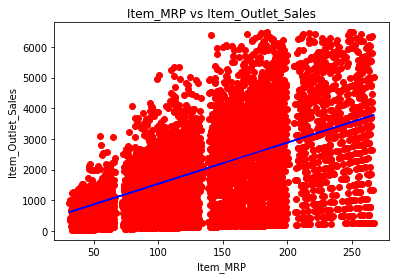

In [144]:
plt.scatter(X_train,Y_train, color='r')
plt.plot(X_train,mymodel.predict(X_train), color='b')
plt.title('Item_MRP vs Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

In [145]:
print results.intercept_, results.coef_

NameError: name 'results' is not defined

In [146]:
import seaborn as sns

AttributeError: 'module' object has no attribute 'plt'

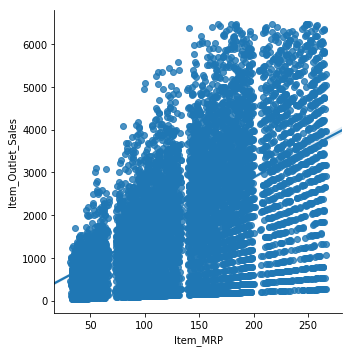

In [149]:
import matplotlib.pyplot as plt
sns.lmplot(x="Item_MRP", y="Item_Outlet_Sales", data=Regression_data)
sns.plt.show()

In [151]:
# from sklearn import linear_model

X = Regression_data[["Item_MRP"]]
y = Regression_data[["Item_Outlet_Sales"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, Y)

# Print the coefficients
print results.intercept_, results.coef_

[175.24717612] [[13.5390985]]


In [152]:
 import statsmodels.api as sm

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

C:\Users\Abhijeet sinha\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 2.603e+04
Date:                Mon, 09 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:47:59   Log-Likelihood:                -71323.
No. Observations:                8337   AIC:                         1.426e+05
Df Residuals:                    8336   BIC:                         1.427e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Item_MRP      14.5924      0.090    161.352      0.0